

## Prepare the dataset
                
### Input CSV file
            
The data is originally from American Community Survey 2010-2012 Public Use Microdata Series. The dataset consists of 75 STEM major studies divided into 5 categories. It also gives the number of men and women in each major along with the median salary and the proportion of women(ShareWomen) in each STEM major.
Data: https://github.com/fivethirtyeight/data/blob/master/college-majors/women-stem.csv

In [1]:
#initial_code, the code written here will be shown to user, write here initial setup to help user get started.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv")
data.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


Use pd.read_csv() function

In [ ]:
#answer, write code which is a solution for above question.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv")
data.head()

In [ ]:
#this is assertion block which verifies the solution.

try:
    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



##  Explanatory Data Analysis (EDA)
                
### Understanding percentage of Women
            
We use scatter plot to see what the relationship between ShareWomen (percentage) and the Median Salary.
The sns.jointplot would give a pretty figure also with side distribution.


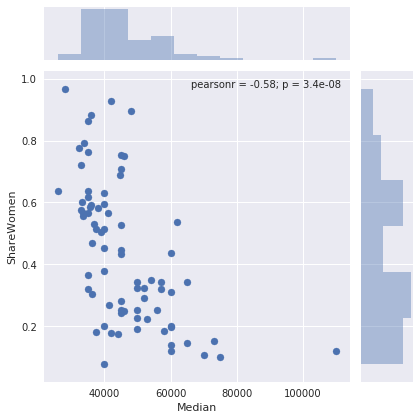

In [2]:
sns.jointplot(x="Median", y="ShareWomen", data=data)

Use sns.jointplot() function

In [ ]:
#answer, write code which is a solution for above question.
sns.jointplot(x="Median", y="ShareWomen", data=data)

In [3]:
#this is assertion block which verifies the solution.

try:
    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue




## Outliers Identification
                
### Using box plot
            
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.


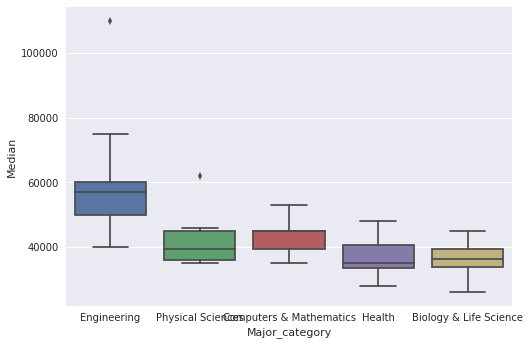

In [4]:
sns.boxplot(x="Major_category", y="Median",data=data)

use sns.boxplot()

In [ ]:
#answer, write code which is a solution for above question.
sns.boxplot(x="Major_category", y="Median",data=data)

In [ ]:
#this is assertion block which verifies the solution.

try:
    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## Remove Outliers
                
### lesson_subheading
            
From the previous plot, we can find some outliers is not in the general range. So we use statistical filter skills to remove them.


In [5]:
filted_data=data[data["Median"] < data["Median"].quantile(0.98)]

hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.
filted_data=data[data["Median"] < data["Median"].quantile(0.98)]

In [ ]:
#this is assertion block which verifies the solution.

try:

    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## Split Dataset
                
### lesson_subheading
            
It is typically to split the dataset into training set and test set.
Here we split the dataset into training and testing at 80:20 ratio. Use random seed = 12345. 


In [6]:
train=filted_data.sample(frac=0.8,random_state=12345)
test=filted_data.drop(train.index)

hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.
train=filted_data.sample(frac=0.8,random_state=12345)
test=filted_data.drop(train.index)

In [ ]:
#this is assertion block which verifies the solution.

try:
    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## Linear Regression Model
                
### Sklearn linear model
            
We can see there is certain relationship between Median salary and ShareWomen. Here we are going to build linear regression model to predict and validate.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


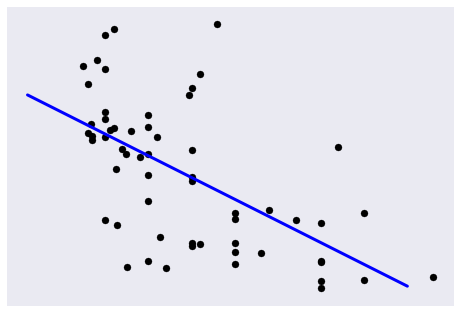

In [13]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
# Create linear regression object
stem_model = linear_model.LinearRegression()

# Train the model using the training sets

tx = train.Median.reshape(59,1)
ty = train.ShareWomen.reshape(59,1)

ttx = test.Median.reshape(15,1)
stem_model.fit(tx, ty)
tty = stem_model.predict(ttx)

# Plot outputs
plt.scatter(tx, ty,  color='black')
plt.plot(ttx, tty, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
# Create linear regression object
stem_model = linear_model.LinearRegression()

# Train the model using the training sets

tx = train.Median.reshape(59,1)
ty = train.ShareWomen.reshape(59,1)

ttx = test.Median.reshape(15,1)
stem_model.fit(tx, ty)
tty = stem_model.predict(ttx)

# Plot outputs
plt.scatter(tx, ty,  color='black')
plt.plot(ttx, tty, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#this is assertion block which verifies the solution.

try:

    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## Model Validation
                
### Mean squared error
            
Now we build a linear regression model. And there are some measurements change how good this model is. 
We can introduce three factors:
Coefficients
Mean squared error
Variance score


In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test.ShareWomen.reshape(15,1), tty))
# Explained variance score: 1 is perfect prediction
print('R squared score: %.2f' % r2_score(test.ShareWomen.reshape(15,1), tty))


Coefficients: 
 [[ -1.27939264e-05]]
Mean squared error: 0.05
Variance score: 0.31


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test.ShareWomen.reshape(15,1), tty))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test.ShareWomen.reshape(15,1), tty))

In [ ]:
#this is assertion block which verifies the solution.

try:

    ref_assert_var = True
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')



## Multivariable Linear Regression
                
### Additional material
            
The R squared score of last model is not very high, meaning the fitness the model is not very satisfying. Therefore, another variable is added to improve the fitness.

In [17]:
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

lm = sm.ols(formula='ShareWomen ~ Median+Major_code', data=train).fit()
y_hat = lm.predict(test[['Median', 'Major_code']])
mse_lm = mean_squared_error(test['ShareWomen'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-Squared: ", r_squared)

MSE: 0.0249736819509 R-Squared:  0.617459871662


hint, write any hint here for the above question.

In [ ]:
#answer, write code which is a solution for above question.
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

lm = sm.ols(formula='ShareWomen ~ Median+Major_code', data=train).fit()
y_hat = lm.predict(test[['Median', 'Major_code']])
mse_lm = mean_squared_error(test['ShareWomen'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-Squared: ", r_squared)